# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [15]:
data_dir = '/input'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

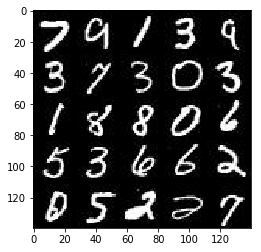

In [16]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

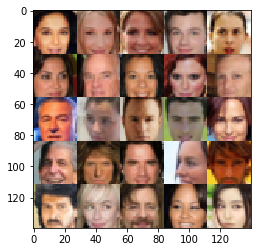

In [17]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [18]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [19]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, shape = (None, image_width, image_height, image_channels), name="input_real")
    input_z = tf.placeholder(tf.float32, shape = (None, z_dim), name="input_z")
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')

    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [20]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
         
    
        x1 = tf.layers.conv2d(images, 128, 5, strides=2, padding='same',kernel_initializer = tf.random_normal_initializer(stddev=0.05))
        lrelu1 = tf.maximum(0.2 * x1, x1)
    
    
        x2 = tf.layers.conv2d(lrelu1, 256, 5, strides=2, padding='same',kernel_initializer = tf.random_normal_initializer(stddev=0.05))
        bn2 = tf.layers.batch_normalization(x2, training=True)
        lrelu2 = tf.maximum(0.2 * bn2, bn2)
       
        
        x3 = tf.layers.conv2d(lrelu2, 512, 5, strides=2, padding='same',kernel_initializer = tf.random_normal_initializer(stddev=0.05))
        bn3 = tf.layers.batch_normalization(x3, training=True)
        lrelu3 = tf.maximum(0.2 * bn3, bn3)
        
        
        
        flat = tf.reshape(lrelu3, (-1, 4*4*512))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

    return out, logits 



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [21]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    with tf.variable_scope('generator',reuse = not is_train):
       
        x1 = tf.layers.dense(z, 7*7*512)
        
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(0.1 * x1, x1)
       
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(0.1 * x2, x2)
        
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(0.1 * x3, x3)
       
        
        
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 3, strides=1, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        
        
        
        out = tf.tanh(logits)
        
  
    return out 





"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [22]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    smooth = 0.1
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real) * (1 - smooth)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    return d_loss, g_loss




"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [23]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1 = beta1).minimize(d_loss, var_list=d_vars)
   
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [24]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [25]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    steps = 0
    _, image_width, image_height, image_channels = data_shape
    input_real, input_z, lr = model_inputs(image_width, image_height,image_channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z,image_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    is_train = tf.placeholder(tf.bool)
        
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images = batch_images * 2
                
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                 # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr:learning_rate})
                #_ = sess.run(g_opt, feed_dict={input_z: batch_z, lr:learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr:learning_rate,is_train:True})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr:learning_rate,is_train:False})
                
                if steps % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % 100 == 0:
                    #Print the current image
                    show_generator_output(sess, 50, input_z, image_channels, data_image_mode)
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 4.2499... Generator Loss: 0.0641
Epoch 1/2... Discriminator Loss: 3.7291... Generator Loss: 0.0533
Epoch 1/2... Discriminator Loss: 2.7135... Generator Loss: 0.1799
Epoch 1/2... Discriminator Loss: 2.3901... Generator Loss: 0.4733
Epoch 1/2... Discriminator Loss: 2.3542... Generator Loss: 0.2064
Epoch 1/2... Discriminator Loss: 2.3612... Generator Loss: 0.1958
Epoch 1/2... Discriminator Loss: 2.3216... Generator Loss: 0.2057
Epoch 1/2... Discriminator Loss: 1.9131... Generator Loss: 0.6242
Epoch 1/2... Discriminator Loss: 1.8503... Generator Loss: 0.9657
Epoch 1/2... Discriminator Loss: 1.9190... Generator Loss: 0.7133


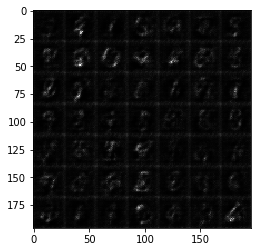

Epoch 1/2... Discriminator Loss: 1.6544... Generator Loss: 0.8087
Epoch 1/2... Discriminator Loss: 1.7489... Generator Loss: 0.3774
Epoch 1/2... Discriminator Loss: 1.7436... Generator Loss: 0.3420
Epoch 1/2... Discriminator Loss: 1.4356... Generator Loss: 0.7839
Epoch 1/2... Discriminator Loss: 1.4610... Generator Loss: 0.5944
Epoch 1/2... Discriminator Loss: 1.8580... Generator Loss: 1.5923
Epoch 1/2... Discriminator Loss: 1.4417... Generator Loss: 0.8280
Epoch 1/2... Discriminator Loss: 1.8918... Generator Loss: 0.2839
Epoch 1/2... Discriminator Loss: 1.6186... Generator Loss: 0.5602
Epoch 1/2... Discriminator Loss: 1.7181... Generator Loss: 0.3313


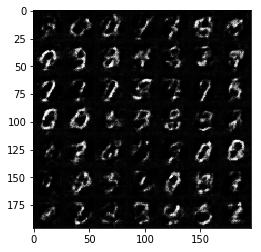

Epoch 1/2... Discriminator Loss: 1.7529... Generator Loss: 0.3414
Epoch 1/2... Discriminator Loss: 1.6550... Generator Loss: 0.8182
Epoch 1/2... Discriminator Loss: 2.0221... Generator Loss: 0.2381
Epoch 1/2... Discriminator Loss: 1.6142... Generator Loss: 1.0066
Epoch 1/2... Discriminator Loss: 2.0802... Generator Loss: 0.2191
Epoch 1/2... Discriminator Loss: 1.7552... Generator Loss: 0.5524
Epoch 1/2... Discriminator Loss: 1.6768... Generator Loss: 0.8747
Epoch 1/2... Discriminator Loss: 1.7950... Generator Loss: 0.5055
Epoch 1/2... Discriminator Loss: 1.9043... Generator Loss: 0.2850
Epoch 1/2... Discriminator Loss: 1.5948... Generator Loss: 0.6314


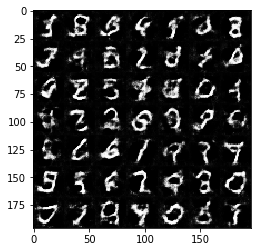

Epoch 1/2... Discriminator Loss: 1.7877... Generator Loss: 1.0642
Epoch 1/2... Discriminator Loss: 1.5116... Generator Loss: 0.7834
Epoch 1/2... Discriminator Loss: 1.8068... Generator Loss: 0.3224
Epoch 1/2... Discriminator Loss: 1.7301... Generator Loss: 0.3538
Epoch 1/2... Discriminator Loss: 1.5895... Generator Loss: 0.6774
Epoch 1/2... Discriminator Loss: 1.6124... Generator Loss: 0.8695
Epoch 1/2... Discriminator Loss: 1.6478... Generator Loss: 1.0078
Epoch 1/2... Discriminator Loss: 1.5891... Generator Loss: 0.4823
Epoch 1/2... Discriminator Loss: 1.6993... Generator Loss: 0.4450
Epoch 1/2... Discriminator Loss: 1.5956... Generator Loss: 0.6721


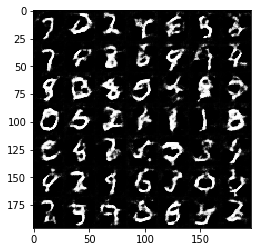

Epoch 1/2... Discriminator Loss: 1.5181... Generator Loss: 1.2158
Epoch 1/2... Discriminator Loss: 1.4231... Generator Loss: 0.6244
Epoch 1/2... Discriminator Loss: 1.5862... Generator Loss: 0.4566
Epoch 1/2... Discriminator Loss: 1.5854... Generator Loss: 0.7199
Epoch 1/2... Discriminator Loss: 1.7306... Generator Loss: 0.3458
Epoch 1/2... Discriminator Loss: 1.6656... Generator Loss: 0.4302
Epoch 1/2... Discriminator Loss: 1.4168... Generator Loss: 0.8335
Epoch 1/2... Discriminator Loss: 1.4744... Generator Loss: 0.6765
Epoch 1/2... Discriminator Loss: 1.5601... Generator Loss: 0.5613
Epoch 1/2... Discriminator Loss: 1.4586... Generator Loss: 0.8320


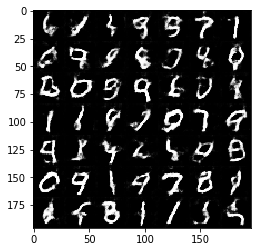

Epoch 1/2... Discriminator Loss: 1.4834... Generator Loss: 0.5924
Epoch 1/2... Discriminator Loss: 1.4752... Generator Loss: 0.8716
Epoch 1/2... Discriminator Loss: 1.8868... Generator Loss: 0.2832
Epoch 1/2... Discriminator Loss: 1.5631... Generator Loss: 0.4911
Epoch 1/2... Discriminator Loss: 1.6807... Generator Loss: 0.3986
Epoch 1/2... Discriminator Loss: 1.6839... Generator Loss: 0.3912
Epoch 1/2... Discriminator Loss: 1.5271... Generator Loss: 0.5341
Epoch 1/2... Discriminator Loss: 1.4463... Generator Loss: 0.7523
Epoch 1/2... Discriminator Loss: 1.5116... Generator Loss: 0.5116
Epoch 1/2... Discriminator Loss: 1.4913... Generator Loss: 0.9575


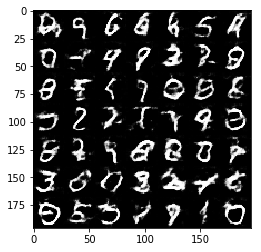

Epoch 1/2... Discriminator Loss: 1.4408... Generator Loss: 0.7423
Epoch 1/2... Discriminator Loss: 1.4848... Generator Loss: 0.5163
Epoch 1/2... Discriminator Loss: 1.4820... Generator Loss: 0.8153
Epoch 1/2... Discriminator Loss: 1.7282... Generator Loss: 0.3455
Epoch 1/2... Discriminator Loss: 1.5612... Generator Loss: 0.4747
Epoch 1/2... Discriminator Loss: 1.6060... Generator Loss: 0.5546
Epoch 1/2... Discriminator Loss: 1.4680... Generator Loss: 0.5457
Epoch 1/2... Discriminator Loss: 1.4794... Generator Loss: 0.5779
Epoch 1/2... Discriminator Loss: 1.4114... Generator Loss: 0.9572
Epoch 1/2... Discriminator Loss: 1.5161... Generator Loss: 0.5370


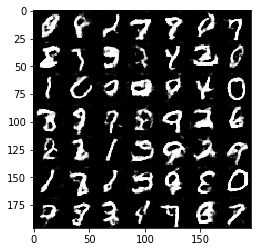

Epoch 1/2... Discriminator Loss: 1.7562... Generator Loss: 0.3214
Epoch 1/2... Discriminator Loss: 1.6186... Generator Loss: 0.4360
Epoch 1/2... Discriminator Loss: 1.4542... Generator Loss: 0.4968
Epoch 1/2... Discriminator Loss: 1.4280... Generator Loss: 0.8526
Epoch 1/2... Discriminator Loss: 1.3919... Generator Loss: 0.8153
Epoch 1/2... Discriminator Loss: 1.3626... Generator Loss: 0.8283
Epoch 1/2... Discriminator Loss: 1.7389... Generator Loss: 0.3268
Epoch 1/2... Discriminator Loss: 1.4788... Generator Loss: 0.4796
Epoch 1/2... Discriminator Loss: 1.5091... Generator Loss: 0.5218
Epoch 1/2... Discriminator Loss: 1.4410... Generator Loss: 0.7403


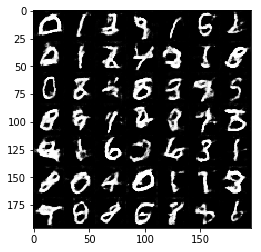

Epoch 1/2... Discriminator Loss: 1.5819... Generator Loss: 0.8610
Epoch 1/2... Discriminator Loss: 1.4762... Generator Loss: 1.0743
Epoch 1/2... Discriminator Loss: 1.5217... Generator Loss: 0.9211
Epoch 1/2... Discriminator Loss: 1.5193... Generator Loss: 0.5355
Epoch 1/2... Discriminator Loss: 1.3524... Generator Loss: 1.0617
Epoch 1/2... Discriminator Loss: 1.4999... Generator Loss: 0.4966
Epoch 1/2... Discriminator Loss: 1.7540... Generator Loss: 0.3332
Epoch 1/2... Discriminator Loss: 1.4661... Generator Loss: 1.2043
Epoch 1/2... Discriminator Loss: 1.4167... Generator Loss: 0.7134
Epoch 1/2... Discriminator Loss: 1.6921... Generator Loss: 0.3498


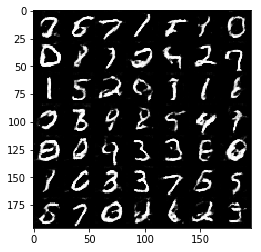

Epoch 1/2... Discriminator Loss: 1.4869... Generator Loss: 0.6349
Epoch 1/2... Discriminator Loss: 1.4511... Generator Loss: 1.0324
Epoch 1/2... Discriminator Loss: 1.9818... Generator Loss: 0.2380
Epoch 2/2... Discriminator Loss: 1.6345... Generator Loss: 0.4402
Epoch 2/2... Discriminator Loss: 1.4519... Generator Loss: 0.5420
Epoch 2/2... Discriminator Loss: 1.4855... Generator Loss: 0.6597
Epoch 2/2... Discriminator Loss: 1.5666... Generator Loss: 0.4137
Epoch 2/2... Discriminator Loss: 1.3864... Generator Loss: 0.6314
Epoch 2/2... Discriminator Loss: 1.4045... Generator Loss: 0.8923
Epoch 2/2... Discriminator Loss: 1.5766... Generator Loss: 0.6339


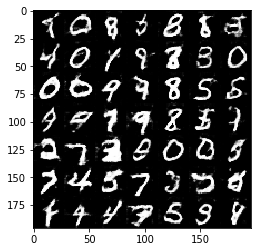

Epoch 2/2... Discriminator Loss: 1.5515... Generator Loss: 0.4369
Epoch 2/2... Discriminator Loss: 1.7594... Generator Loss: 0.3178
Epoch 2/2... Discriminator Loss: 1.6143... Generator Loss: 0.8256
Epoch 2/2... Discriminator Loss: 1.4995... Generator Loss: 0.6818
Epoch 2/2... Discriminator Loss: 1.4233... Generator Loss: 0.6821
Epoch 2/2... Discriminator Loss: 2.0269... Generator Loss: 0.2365
Epoch 2/2... Discriminator Loss: 1.6454... Generator Loss: 0.4576
Epoch 2/2... Discriminator Loss: 1.4918... Generator Loss: 0.5026
Epoch 2/2... Discriminator Loss: 1.8677... Generator Loss: 0.2702
Epoch 2/2... Discriminator Loss: 1.3824... Generator Loss: 0.8308


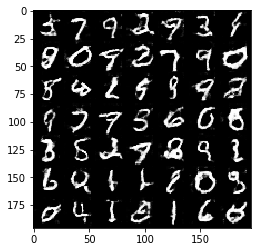

Epoch 2/2... Discriminator Loss: 1.9270... Generator Loss: 0.2581
Epoch 2/2... Discriminator Loss: 1.3324... Generator Loss: 0.9293
Epoch 2/2... Discriminator Loss: 1.5848... Generator Loss: 0.4421
Epoch 2/2... Discriminator Loss: 1.8970... Generator Loss: 0.2679
Epoch 2/2... Discriminator Loss: 1.5416... Generator Loss: 0.4612
Epoch 2/2... Discriminator Loss: 1.4976... Generator Loss: 1.0343
Epoch 2/2... Discriminator Loss: 1.6017... Generator Loss: 0.3972
Epoch 2/2... Discriminator Loss: 1.3544... Generator Loss: 0.7419
Epoch 2/2... Discriminator Loss: 1.4609... Generator Loss: 0.4968
Epoch 2/2... Discriminator Loss: 1.5122... Generator Loss: 0.9886


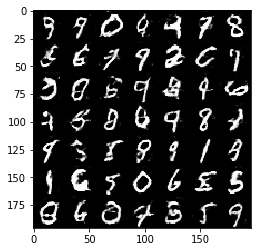

Epoch 2/2... Discriminator Loss: 1.3387... Generator Loss: 0.6763
Epoch 2/2... Discriminator Loss: 2.7113... Generator Loss: 2.5125
Epoch 2/2... Discriminator Loss: 1.6795... Generator Loss: 0.3685
Epoch 2/2... Discriminator Loss: 1.3437... Generator Loss: 0.6808
Epoch 2/2... Discriminator Loss: 1.4133... Generator Loss: 0.7078
Epoch 2/2... Discriminator Loss: 1.3959... Generator Loss: 0.5330
Epoch 2/2... Discriminator Loss: 1.6024... Generator Loss: 0.3999
Epoch 2/2... Discriminator Loss: 1.4092... Generator Loss: 0.7861
Epoch 2/2... Discriminator Loss: 1.5654... Generator Loss: 0.4119
Epoch 2/2... Discriminator Loss: 1.5325... Generator Loss: 0.4447


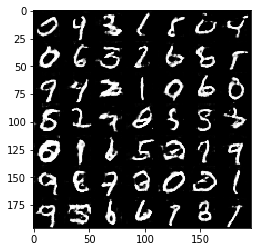

Epoch 2/2... Discriminator Loss: 1.3600... Generator Loss: 0.7347
Epoch 2/2... Discriminator Loss: 1.2248... Generator Loss: 0.8703
Epoch 2/2... Discriminator Loss: 1.5386... Generator Loss: 0.4134
Epoch 2/2... Discriminator Loss: 1.3732... Generator Loss: 0.7556
Epoch 2/2... Discriminator Loss: 1.3233... Generator Loss: 1.0664
Epoch 2/2... Discriminator Loss: 1.3551... Generator Loss: 0.9122
Epoch 2/2... Discriminator Loss: 1.5595... Generator Loss: 0.4669
Epoch 2/2... Discriminator Loss: 1.5050... Generator Loss: 0.9594
Epoch 2/2... Discriminator Loss: 1.6920... Generator Loss: 1.4101
Epoch 2/2... Discriminator Loss: 1.4250... Generator Loss: 0.7954


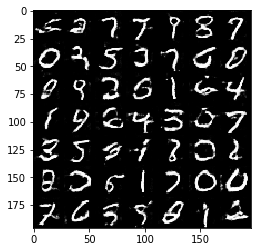

Epoch 2/2... Discriminator Loss: 1.4291... Generator Loss: 0.5883
Epoch 2/2... Discriminator Loss: 1.3466... Generator Loss: 0.6557
Epoch 2/2... Discriminator Loss: 1.4576... Generator Loss: 0.5947
Epoch 2/2... Discriminator Loss: 1.3341... Generator Loss: 0.7007
Epoch 2/2... Discriminator Loss: 1.9114... Generator Loss: 0.2730
Epoch 2/2... Discriminator Loss: 1.2821... Generator Loss: 0.6881
Epoch 2/2... Discriminator Loss: 1.2786... Generator Loss: 0.7649
Epoch 2/2... Discriminator Loss: 1.5409... Generator Loss: 0.7249
Epoch 2/2... Discriminator Loss: 1.7857... Generator Loss: 0.6590
Epoch 2/2... Discriminator Loss: 1.4101... Generator Loss: 0.5438


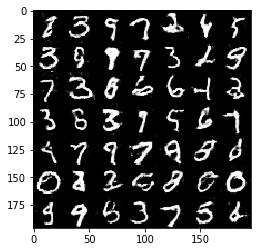

Epoch 2/2... Discriminator Loss: 1.6348... Generator Loss: 0.4351
Epoch 2/2... Discriminator Loss: 1.3525... Generator Loss: 0.8668
Epoch 2/2... Discriminator Loss: 1.7247... Generator Loss: 0.3166
Epoch 2/2... Discriminator Loss: 1.7884... Generator Loss: 0.3146
Epoch 2/2... Discriminator Loss: 1.3623... Generator Loss: 0.6116
Epoch 2/2... Discriminator Loss: 1.4127... Generator Loss: 0.5536
Epoch 2/2... Discriminator Loss: 1.4408... Generator Loss: 0.5473
Epoch 2/2... Discriminator Loss: 1.3407... Generator Loss: 0.9297
Epoch 2/2... Discriminator Loss: 1.3717... Generator Loss: 0.7016
Epoch 2/2... Discriminator Loss: 1.7572... Generator Loss: 0.3260


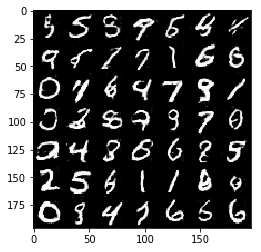

Epoch 2/2... Discriminator Loss: 2.2657... Generator Loss: 0.2464
Epoch 2/2... Discriminator Loss: 1.4913... Generator Loss: 0.6226
Epoch 2/2... Discriminator Loss: 1.2648... Generator Loss: 0.7052
Epoch 2/2... Discriminator Loss: 1.3262... Generator Loss: 0.7937
Epoch 2/2... Discriminator Loss: 1.4452... Generator Loss: 0.6949
Epoch 2/2... Discriminator Loss: 1.2775... Generator Loss: 0.7324
Epoch 2/2... Discriminator Loss: 1.5847... Generator Loss: 0.4032
Epoch 2/2... Discriminator Loss: 1.5863... Generator Loss: 1.0922
Epoch 2/2... Discriminator Loss: 1.5246... Generator Loss: 0.4453
Epoch 2/2... Discriminator Loss: 1.5804... Generator Loss: 0.3810


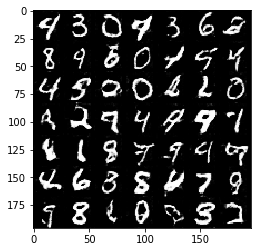

Epoch 2/2... Discriminator Loss: 1.5135... Generator Loss: 0.4963
Epoch 2/2... Discriminator Loss: 1.3923... Generator Loss: 0.5957
Epoch 2/2... Discriminator Loss: 1.4020... Generator Loss: 0.5445
Epoch 2/2... Discriminator Loss: 1.2944... Generator Loss: 0.8813
Epoch 2/2... Discriminator Loss: 1.8691... Generator Loss: 0.2881
Epoch 2/2... Discriminator Loss: 1.3402... Generator Loss: 0.7833
Epoch 2/2... Discriminator Loss: 1.3734... Generator Loss: 0.5617
Epoch 2/2... Discriminator Loss: 1.3918... Generator Loss: 0.7470
Epoch 2/2... Discriminator Loss: 1.5523... Generator Loss: 1.5584
Epoch 2/2... Discriminator Loss: 1.4792... Generator Loss: 0.4730


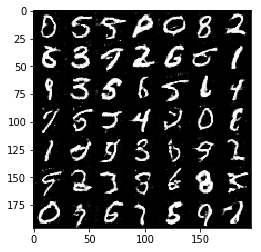

Epoch 2/2... Discriminator Loss: 1.2707... Generator Loss: 0.6755
Epoch 2/2... Discriminator Loss: 1.3948... Generator Loss: 0.6411
Epoch 2/2... Discriminator Loss: 1.4349... Generator Loss: 0.5099
Epoch 2/2... Discriminator Loss: 1.7112... Generator Loss: 0.3281
Epoch 2/2... Discriminator Loss: 1.3248... Generator Loss: 0.6817
Epoch 2/2... Discriminator Loss: 1.6364... Generator Loss: 0.3885
Epoch 2/2... Discriminator Loss: 1.4008... Generator Loss: 0.8039


In [26]:
batch_size = 64
z_dim = 100
learning_rate = 0.0003
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 7.0832... Generator Loss: 0.0023
Epoch 1/1... Discriminator Loss: 2.4445... Generator Loss: 0.4878
Epoch 1/1... Discriminator Loss: 3.2279... Generator Loss: 0.1156
Epoch 1/1... Discriminator Loss: 2.3252... Generator Loss: 3.7886
Epoch 1/1... Discriminator Loss: 2.8623... Generator Loss: 0.1214
Epoch 1/1... Discriminator Loss: 2.5248... Generator Loss: 0.1710
Epoch 1/1... Discriminator Loss: 1.7909... Generator Loss: 0.8968
Epoch 1/1... Discriminator Loss: 1.5623... Generator Loss: 1.8665
Epoch 1/1... Discriminator Loss: 2.3290... Generator Loss: 0.4035
Epoch 1/1... Discriminator Loss: 1.7991... Generator Loss: 0.4163


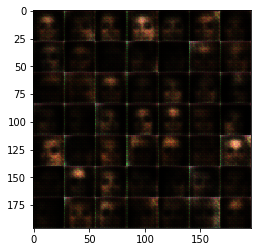

Epoch 1/1... Discriminator Loss: 1.9027... Generator Loss: 0.3880
Epoch 1/1... Discriminator Loss: 1.9172... Generator Loss: 0.3949
Epoch 1/1... Discriminator Loss: 1.7501... Generator Loss: 0.5407
Epoch 1/1... Discriminator Loss: 1.8516... Generator Loss: 0.4957
Epoch 1/1... Discriminator Loss: 2.2250... Generator Loss: 0.5133
Epoch 1/1... Discriminator Loss: 1.8057... Generator Loss: 0.4969
Epoch 1/1... Discriminator Loss: 1.6985... Generator Loss: 0.7747
Epoch 1/1... Discriminator Loss: 1.6515... Generator Loss: 0.5136
Epoch 1/1... Discriminator Loss: 0.9948... Generator Loss: 1.9196
Epoch 1/1... Discriminator Loss: 1.7895... Generator Loss: 0.3658


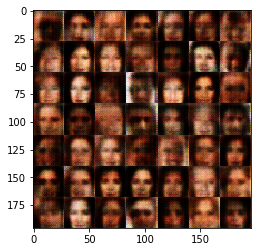

Epoch 1/1... Discriminator Loss: 1.6140... Generator Loss: 1.4051
Epoch 1/1... Discriminator Loss: 1.8157... Generator Loss: 0.3789
Epoch 1/1... Discriminator Loss: 1.5017... Generator Loss: 1.1040
Epoch 1/1... Discriminator Loss: 1.0046... Generator Loss: 1.9638
Epoch 1/1... Discriminator Loss: 1.3435... Generator Loss: 2.1348
Epoch 1/1... Discriminator Loss: 1.3094... Generator Loss: 1.3257
Epoch 1/1... Discriminator Loss: 1.7500... Generator Loss: 0.4055
Epoch 1/1... Discriminator Loss: 1.5142... Generator Loss: 0.7286
Epoch 1/1... Discriminator Loss: 1.4210... Generator Loss: 1.1046
Epoch 1/1... Discriminator Loss: 1.2962... Generator Loss: 0.8111


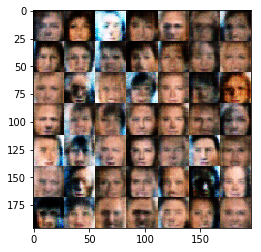

Epoch 1/1... Discriminator Loss: 1.6546... Generator Loss: 0.6660
Epoch 1/1... Discriminator Loss: 1.6143... Generator Loss: 0.7569
Epoch 1/1... Discriminator Loss: 1.6107... Generator Loss: 0.7800
Epoch 1/1... Discriminator Loss: 1.5868... Generator Loss: 0.8596
Epoch 1/1... Discriminator Loss: 1.7696... Generator Loss: 0.5664
Epoch 1/1... Discriminator Loss: 1.5528... Generator Loss: 0.6249
Epoch 1/1... Discriminator Loss: 1.7373... Generator Loss: 0.5449
Epoch 1/1... Discriminator Loss: 1.5389... Generator Loss: 0.7129
Epoch 1/1... Discriminator Loss: 1.5941... Generator Loss: 0.6197
Epoch 1/1... Discriminator Loss: 1.6502... Generator Loss: 0.6195


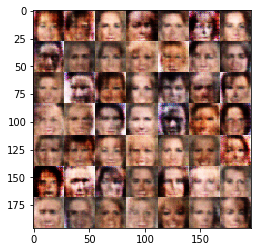

Epoch 1/1... Discriminator Loss: 1.5069... Generator Loss: 0.7376
Epoch 1/1... Discriminator Loss: 1.4015... Generator Loss: 0.9278
Epoch 1/1... Discriminator Loss: 1.5626... Generator Loss: 0.6174
Epoch 1/1... Discriminator Loss: 1.5245... Generator Loss: 0.7303
Epoch 1/1... Discriminator Loss: 1.5299... Generator Loss: 0.6948
Epoch 1/1... Discriminator Loss: 1.5697... Generator Loss: 0.6504
Epoch 1/1... Discriminator Loss: 1.4783... Generator Loss: 0.8230
Epoch 1/1... Discriminator Loss: 1.5197... Generator Loss: 0.7617
Epoch 1/1... Discriminator Loss: 1.5286... Generator Loss: 0.7088
Epoch 1/1... Discriminator Loss: 1.5580... Generator Loss: 0.7272


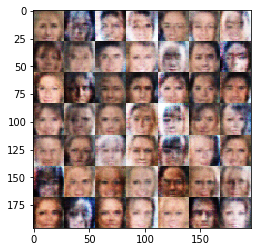

Epoch 1/1... Discriminator Loss: 1.6449... Generator Loss: 0.5989
Epoch 1/1... Discriminator Loss: 1.5920... Generator Loss: 0.6237
Epoch 1/1... Discriminator Loss: 1.5201... Generator Loss: 0.6752
Epoch 1/1... Discriminator Loss: 1.6268... Generator Loss: 0.6631
Epoch 1/1... Discriminator Loss: 1.5114... Generator Loss: 0.7852
Epoch 1/1... Discriminator Loss: 1.6681... Generator Loss: 0.6099
Epoch 1/1... Discriminator Loss: 1.5445... Generator Loss: 0.6393
Epoch 1/1... Discriminator Loss: 1.5480... Generator Loss: 0.7191
Epoch 1/1... Discriminator Loss: 1.6183... Generator Loss: 0.6155
Epoch 1/1... Discriminator Loss: 1.5263... Generator Loss: 0.6713


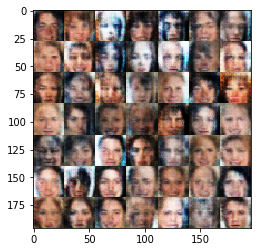

Epoch 1/1... Discriminator Loss: 1.5799... Generator Loss: 0.6914
Epoch 1/1... Discriminator Loss: 1.4546... Generator Loss: 0.7742
Epoch 1/1... Discriminator Loss: 1.4467... Generator Loss: 0.7220
Epoch 1/1... Discriminator Loss: 1.4835... Generator Loss: 0.7223
Epoch 1/1... Discriminator Loss: 1.4507... Generator Loss: 0.7148
Epoch 1/1... Discriminator Loss: 1.4813... Generator Loss: 0.7948
Epoch 1/1... Discriminator Loss: 1.5164... Generator Loss: 0.6220
Epoch 1/1... Discriminator Loss: 1.4720... Generator Loss: 0.7136
Epoch 1/1... Discriminator Loss: 1.5180... Generator Loss: 0.6749
Epoch 1/1... Discriminator Loss: 1.5526... Generator Loss: 0.6147


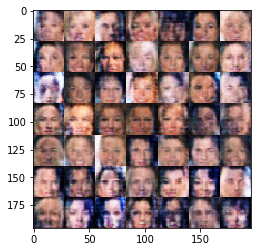

Epoch 1/1... Discriminator Loss: 1.4077... Generator Loss: 0.7654
Epoch 1/1... Discriminator Loss: 1.5060... Generator Loss: 0.7151
Epoch 1/1... Discriminator Loss: 1.3920... Generator Loss: 0.7110
Epoch 1/1... Discriminator Loss: 1.4446... Generator Loss: 0.6827
Epoch 1/1... Discriminator Loss: 1.4454... Generator Loss: 0.8334
Epoch 1/1... Discriminator Loss: 1.4680... Generator Loss: 0.7317
Epoch 1/1... Discriminator Loss: 1.4791... Generator Loss: 0.7833
Epoch 1/1... Discriminator Loss: 1.3938... Generator Loss: 0.7655
Epoch 1/1... Discriminator Loss: 1.4150... Generator Loss: 0.7457
Epoch 1/1... Discriminator Loss: 1.4829... Generator Loss: 0.6695


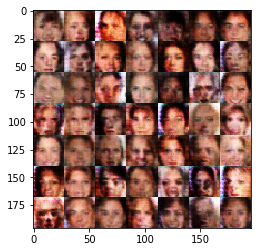

Epoch 1/1... Discriminator Loss: 1.4692... Generator Loss: 0.6873
Epoch 1/1... Discriminator Loss: 1.4123... Generator Loss: 0.7615
Epoch 1/1... Discriminator Loss: 1.5395... Generator Loss: 0.6438
Epoch 1/1... Discriminator Loss: 1.4932... Generator Loss: 0.6957
Epoch 1/1... Discriminator Loss: 1.4522... Generator Loss: 0.6785
Epoch 1/1... Discriminator Loss: 1.4653... Generator Loss: 0.6998
Epoch 1/1... Discriminator Loss: 1.4605... Generator Loss: 0.7478
Epoch 1/1... Discriminator Loss: 1.3890... Generator Loss: 0.8622
Epoch 1/1... Discriminator Loss: 1.4806... Generator Loss: 0.7696
Epoch 1/1... Discriminator Loss: 1.4255... Generator Loss: 0.7468


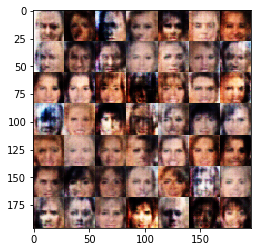

Epoch 1/1... Discriminator Loss: 1.4452... Generator Loss: 0.7222
Epoch 1/1... Discriminator Loss: 1.5501... Generator Loss: 0.6660
Epoch 1/1... Discriminator Loss: 1.5877... Generator Loss: 0.7663
Epoch 1/1... Discriminator Loss: 1.4380... Generator Loss: 0.8121
Epoch 1/1... Discriminator Loss: 1.4696... Generator Loss: 0.7683
Epoch 1/1... Discriminator Loss: 1.5044... Generator Loss: 0.7997
Epoch 1/1... Discriminator Loss: 1.4402... Generator Loss: 0.7350
Epoch 1/1... Discriminator Loss: 1.5237... Generator Loss: 0.7353
Epoch 1/1... Discriminator Loss: 1.3975... Generator Loss: 0.7961
Epoch 1/1... Discriminator Loss: 1.4826... Generator Loss: 0.7172


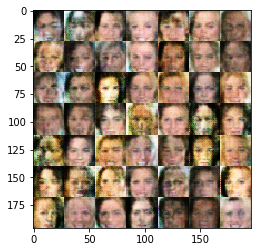

Epoch 1/1... Discriminator Loss: 1.5073... Generator Loss: 0.6941
Epoch 1/1... Discriminator Loss: 1.5402... Generator Loss: 0.6878
Epoch 1/1... Discriminator Loss: 1.5711... Generator Loss: 0.6622
Epoch 1/1... Discriminator Loss: 1.5333... Generator Loss: 0.6857
Epoch 1/1... Discriminator Loss: 1.5606... Generator Loss: 0.5736
Epoch 1/1... Discriminator Loss: 1.6044... Generator Loss: 0.6045
Epoch 1/1... Discriminator Loss: 1.6362... Generator Loss: 0.6954
Epoch 1/1... Discriminator Loss: 1.6281... Generator Loss: 0.6690
Epoch 1/1... Discriminator Loss: 1.4811... Generator Loss: 0.7412
Epoch 1/1... Discriminator Loss: 1.5131... Generator Loss: 0.8663


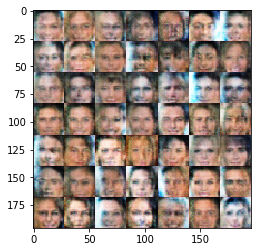

Epoch 1/1... Discriminator Loss: 1.5557... Generator Loss: 0.8545
Epoch 1/1... Discriminator Loss: 1.3957... Generator Loss: 0.8643
Epoch 1/1... Discriminator Loss: 1.3588... Generator Loss: 0.8383
Epoch 1/1... Discriminator Loss: 1.5325... Generator Loss: 0.7653
Epoch 1/1... Discriminator Loss: 1.3942... Generator Loss: 0.7297
Epoch 1/1... Discriminator Loss: 1.5075... Generator Loss: 0.6333
Epoch 1/1... Discriminator Loss: 1.5389... Generator Loss: 0.7584
Epoch 1/1... Discriminator Loss: 1.6490... Generator Loss: 0.5953
Epoch 1/1... Discriminator Loss: 1.5502... Generator Loss: 0.6362
Epoch 1/1... Discriminator Loss: 1.3996... Generator Loss: 0.8274


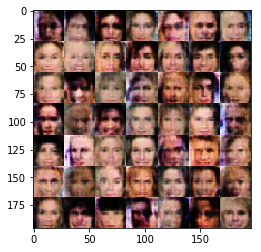

Epoch 1/1... Discriminator Loss: 1.4620... Generator Loss: 0.7194
Epoch 1/1... Discriminator Loss: 1.4136... Generator Loss: 0.8607
Epoch 1/1... Discriminator Loss: 1.4889... Generator Loss: 0.7106
Epoch 1/1... Discriminator Loss: 1.4329... Generator Loss: 0.6720
Epoch 1/1... Discriminator Loss: 1.4304... Generator Loss: 0.9056
Epoch 1/1... Discriminator Loss: 1.4539... Generator Loss: 0.6879
Epoch 1/1... Discriminator Loss: 1.4564... Generator Loss: 0.7284
Epoch 1/1... Discriminator Loss: 1.4202... Generator Loss: 0.9487
Epoch 1/1... Discriminator Loss: 1.4197... Generator Loss: 0.8561
Epoch 1/1... Discriminator Loss: 1.3917... Generator Loss: 0.7120


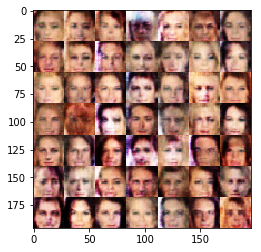

Epoch 1/1... Discriminator Loss: 1.4921... Generator Loss: 0.7534
Epoch 1/1... Discriminator Loss: 1.4653... Generator Loss: 0.8010
Epoch 1/1... Discriminator Loss: 1.3932... Generator Loss: 0.7207
Epoch 1/1... Discriminator Loss: 1.4399... Generator Loss: 0.6802
Epoch 1/1... Discriminator Loss: 1.4348... Generator Loss: 0.8304
Epoch 1/1... Discriminator Loss: 1.3704... Generator Loss: 0.8647
Epoch 1/1... Discriminator Loss: 1.3183... Generator Loss: 0.8310
Epoch 1/1... Discriminator Loss: 1.3474... Generator Loss: 0.7456
Epoch 1/1... Discriminator Loss: 1.4656... Generator Loss: 0.4686


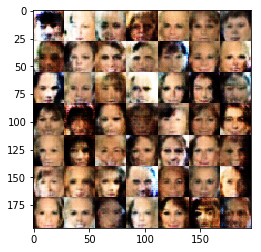

Epoch 1/1... Discriminator Loss: 1.5571... Generator Loss: 1.0121
Epoch 1/1... Discriminator Loss: 1.4709... Generator Loss: 0.9725
Epoch 1/1... Discriminator Loss: 1.4012... Generator Loss: 1.0724
Epoch 1/1... Discriminator Loss: 1.4460... Generator Loss: 0.9648
Epoch 1/1... Discriminator Loss: 1.4612... Generator Loss: 0.7208
Epoch 1/1... Discriminator Loss: 1.3402... Generator Loss: 0.9362
Epoch 1/1... Discriminator Loss: 1.3528... Generator Loss: 0.7018
Epoch 1/1... Discriminator Loss: 1.5158... Generator Loss: 0.9530
Epoch 1/1... Discriminator Loss: 1.4545... Generator Loss: 0.7775
Epoch 1/1... Discriminator Loss: 1.5232... Generator Loss: 0.5493


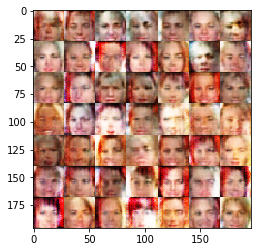

Epoch 1/1... Discriminator Loss: 1.3813... Generator Loss: 0.7394
Epoch 1/1... Discriminator Loss: 1.4854... Generator Loss: 0.7061
Epoch 1/1... Discriminator Loss: 1.4468... Generator Loss: 0.5823
Epoch 1/1... Discriminator Loss: 1.3192... Generator Loss: 0.8298
Epoch 1/1... Discriminator Loss: 1.5007... Generator Loss: 0.9323
Epoch 1/1... Discriminator Loss: 1.4384... Generator Loss: 0.6580
Epoch 1/1... Discriminator Loss: 1.5661... Generator Loss: 0.4723
Epoch 1/1... Discriminator Loss: 1.4383... Generator Loss: 0.7751
Epoch 1/1... Discriminator Loss: 1.4917... Generator Loss: 0.8379
Epoch 1/1... Discriminator Loss: 1.4597... Generator Loss: 0.7051


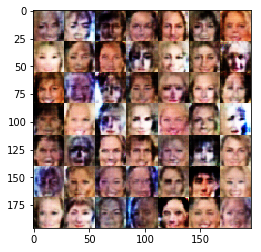

Epoch 1/1... Discriminator Loss: 1.4720... Generator Loss: 0.8546
Epoch 1/1... Discriminator Loss: 1.4786... Generator Loss: 0.6399
Epoch 1/1... Discriminator Loss: 1.5174... Generator Loss: 0.8698
Epoch 1/1... Discriminator Loss: 1.3723... Generator Loss: 0.8930
Epoch 1/1... Discriminator Loss: 1.4921... Generator Loss: 0.7902
Epoch 1/1... Discriminator Loss: 1.4509... Generator Loss: 0.6286
Epoch 1/1... Discriminator Loss: 1.4530... Generator Loss: 0.7531
Epoch 1/1... Discriminator Loss: 1.6211... Generator Loss: 0.8162
Epoch 1/1... Discriminator Loss: 1.3951... Generator Loss: 0.6922
Epoch 1/1... Discriminator Loss: 1.4721... Generator Loss: 0.8112


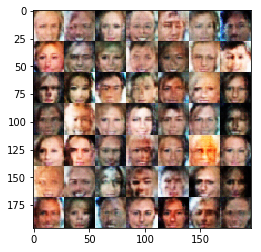

Epoch 1/1... Discriminator Loss: 1.3878... Generator Loss: 0.7136
Epoch 1/1... Discriminator Loss: 1.4477... Generator Loss: 0.7341
Epoch 1/1... Discriminator Loss: 1.4275... Generator Loss: 0.8090
Epoch 1/1... Discriminator Loss: 1.4881... Generator Loss: 0.8652
Epoch 1/1... Discriminator Loss: 1.4412... Generator Loss: 0.8535
Epoch 1/1... Discriminator Loss: 1.4963... Generator Loss: 0.6936
Epoch 1/1... Discriminator Loss: 1.5189... Generator Loss: 0.7161
Epoch 1/1... Discriminator Loss: 1.4608... Generator Loss: 0.7654
Epoch 1/1... Discriminator Loss: 1.5052... Generator Loss: 0.6583
Epoch 1/1... Discriminator Loss: 1.4833... Generator Loss: 0.6701


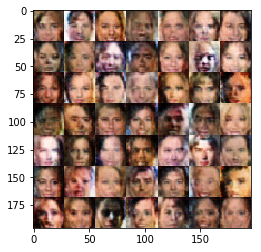

Epoch 1/1... Discriminator Loss: 1.4236... Generator Loss: 0.7333


KeyboardInterrupt: 

In [ ]:
batch_size = 64
z_dim = 100
learning_rate = 0.0006
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.